In [ ]:
jupyter nbconvert HKcourse3.ipynb --to slides --post serve 

# Some Facets of Information Theoretical Graph Analytics

F. Oggier (School of Physical and Mathematical Sciences, NTU, Singapore) 

CSCIT 2019, CUHK

###  Centralities and Entropic Centralities

### Random Graphs and Power Law

### Information Theoretic Clustering

### A Case Study: Bitcoin Forensics

## Information Theoretic Clustering
### General Data

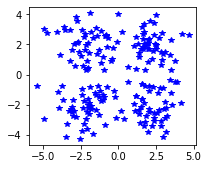

In [8]:
import numpy as np
import matplotlib.pylab as plt

pts = np.random.normal(size=(200, 2))
trans = [[2,2] for i in range(50)]
trans.extend([[2,-2] for i in range(50)])
trans.extend([[-2,2] for i in range(50)])
trans.extend([[-2,-2] for i in range(50)])
data = pts + np.array(trans)

fig = plt.figure(figsize=(3,3))
plt.plot(data[:,0],data[:,1],'*b')
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

How to group data points into clusters such that points in a cluster are more *similar* to each other than to those in other clusters?

Suppose you want to transmit points from this dataset, using only two bits per point (lossy transmission).

What encoder/decoder will lose the least information, given that the loss is the sum squared error between decoded coordinates and original ones?

* Idea 1: break the grid into 4 quarters, label the center of each quarter (00,01,10,11)
* Idea 2: break the grid into 4 quarters, label the centroid of each quarter (00,01,10,11)

Idea 2 leads to $k$-means (A. Moore slides on clustering).

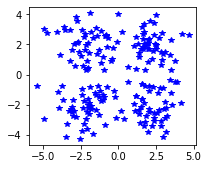

In [9]:
fig = plt.figure(figsize=(3,3))
plt.plot(data[:,0],data[:,1],'*b')
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

**k-means** clustering: 
<div style="background-color:rgba(128, 0, 0, 0.1); text-align:left; vertical-align: middle; padding:20px 0;">
<ol>
<li> Choose how many clusters. ($k=4$) </li>     
<li> Randomly guess $k$ cluster centers. </li> 
<li> Each datapoint finds out its closest center. </li> 
<li> Update each center to the centroid of its points. </li>
<li> Repeat (from 3.) until terminated. </li>
</ol>
</div>

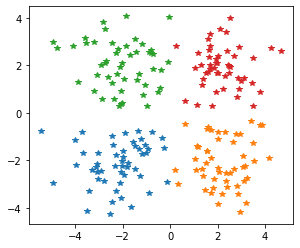

In [10]:
from sklearn.cluster import KMeans
import numpy as np

kmeans = KMeans(n_clusters=4, random_state=0).fit(data)
labels = kmeans.labels_
d0 = data[np.where(labels == 0),:][0]
d1 = data[np.where(labels == 1),:][0]
d2 = data[np.where(labels == 2),:][0]
d3 = data[np.where(labels == 3),:][0]
plt.plot(d0[:,0],d0[:,1],'*',d1[:,0],d1[:,1],'*',d2[:,0],d2[:,1],'*',d3[:,0],d3[:,1],'*')
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

ENCODE: $\mathbb{R}^m \rightarrow [1,...,k]$, ${\bf x}\mapsto i$  
DECODE :$[1,...,k] \rightarrow \mathbb{R}^m$, $i \mapsto {\bf c}$    
Distorsion = $\sum_i ({\bf x}_i -{\bf c}_{{\rm ENCODE}({\bf x}_i)})^2$

How to choose the centers ${\bf c}_1,\ldots,{\bf c}_k$ so that the distorsion is minimized?

Points must be encoded to the nearest center (otherwise using the nearest center would minimize the distorsion):
${\bf c}_{{\rm ENCODE}({\bf x}_i)} = \arg\min_{{\bf c}_1,\ldots,{\bf c}_k} ({\bf x}_i -{\bf c}_j)^2$

$\frac{\partial {\rm Distorsion}}{\partial {\bf c}_l} = \frac{\partial}{\partial {\bf c}_l} \sum_{j=1}^k \sum_{{\bf x}_i \mbox{with center }{\bf c}_j}({\bf x}_i -{\bf c}_j)^2= -2 \sum_{{\bf x}_i \mbox{with center }{\bf c}_j}({\bf x}_i -{\bf c}_j)$, thus at the minimum: 
${\bf c}_j = \frac{1}{|{\bf x}_i \mbox{with center }{\bf c}_j|}\sum_{{\bf x}_i \mbox{with center }{\bf c}_j}$. 

Thus each center must be the centroid of its own points.

The procedure stops when there is no change in configuration: there is a finite number of configurations, and the configuration changes only if it reduces the distorsion, meaning a new configuration not encountered before, so it cannot continue forever (eventually we run out of configurations).

No guarantee of finding the optimal configuration.

How do we choose the initial centers?

How do we know how many clusters we want?


**Hierarchical clustering (single linkage)**

<div style="background-color:rgba(128, 0, 0, 0.1); text-align:left; vertical-align: middle; padding:20px 0;">
<ol>
<li> Every point is its own cluster. </li> 
<li> Find most similar pair of clusters.</li>   
<li> Merge it into a parent cluster.</li>
</ol>
</div>

May also start with existing clusters.

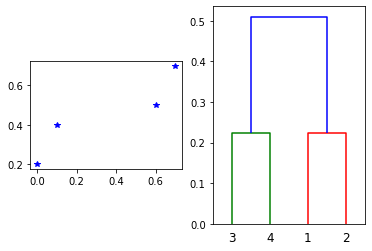

In [39]:
from scipy.cluster.hierarchy import dendrogram, linkage

smalldata = np.array([[0,0.2],[0.1,0.4],[0.6,0.5],[0.7,0.7]])

linked = linkage(smalldata, 'single')
labelList = range(1,5)

fig = plt.figure(figsize=(6,4))
plt.subplot(1, 2, 1)
plt.plot(smalldata[:,0],smalldata[:,1],'*b')
plt.gca().set_aspect('equal', adjustable='box')

plt.subplot(1, 2, 2)
dendrogram(linked,orientation='top',labels=labelList,distance_sort='descending',show_leaf_counts=True)
plt.show()

Points to be clustered are realizations of some probability distributions, if we see each cluster as coming from some probability distribution, then we are looking at distances among distributions (Hartigan 75).

Kullback-Leibler distance: $D_{KL}(p,q)=\int p(x)log(p(x)/q(x))d(x)$

Bhattacharyya distance: $D_B(p,q)=-\ln\int\sqrt{p(x)q(x)}dx$

Renyi distance: $D_R(p,q)=\frac{1}{\alpha-1}\ln \int f(x)^\alpha g(x)^{1-\alpha} dx$, $\alpha >0$, $\alpha \neq 1$.

Problem: the distributions are unknown, how to compute the above quantities without knowing the distributions? we need to (nonparametrically) estimate them (entropy estimation is a topic of its own). 

One solution (Gokcay 02): use Renyi entropy $H_2(p) = -\ln \int p^2({\bf x})d{\bf x}$.


For $p({\bf x})$ given by $N$ of its samples, $P = \int_{\mathcal{R}}p({\bf x})d{\bf x}$ is the probability that a vector with pdf $p({\bf x})$ falls in $\mathcal{R}$. If $\mathcal{R}$ is small enough that $p({\bf x})$ varies little within it, $P$ can be approximated by $P \approx p({\bf x})\int_{\mathcal{R}}d{\bf x}$, where $\int_{\mathcal{R}}d{\bf x}$ is the volume of $\mathcal{R}$. 

Given $N$ samples ${\bf x}_1,\ldots,{\bf x}_N$ in $\mathbb{R}^d$ which are independently drawn according to $p({\bf x})$, say there are $k$ out of the $N$ samples falling with $\mathcal{R}$, then $P =\tfrac{k}{N}$ and $\hat{p}({\bf x}) = \frac{k/N}{\int_{\mathcal{R}}d{\bf x}}$.

If $\mathcal{R}$ is a hypercube with edge length $h$ centered at ${\bf x}$, then $\int_{\mathcal{R}}d{\bf x}=h^d$, and the following window function $W$ indicates whether ${\bf x}_i$ is inside $\mathcal{R}$:
$
W_h({\bf x}_i-{\bf x}) = \left\{
\begin{array}{ll}
1 &\mbox{ if }\tfrac{|x_j-x_{ij}|}{h} \leq \tfrac{1}{2},~j=1,\ldots,d\\
0 &\mbox{ else.}
\end{array}
\right.
$
The total number $k$ of samples falling in $\mathcal{R}$ is thus given by
$k = \sum_{i=1}^N W_h({\bf x}-{\bf x}_i)$ and the **Parzen window estimator** (Parzen 62) is given by $\hat{p}({\bf x}) = \frac{1}{N}\sum_{i=1}^N \frac{1}{h^d} W_{h}({\bf x}-{\bf x}_i)$.

The window function $W_h$ can be replaced by a symmetric multivariate probability density function, called *kernel function*.

A typical choice for the window or kernel function $W_h$ is the Gaussian function given by $W_{\sigma}({\bf x}-{\bf x}_i)=\frac{1}{\sqrt{2\pi^d}}\exp\left(-\frac{1}{2\sigma^2}||{\bf x}-{\bf x}_i ||^2\right)$, where  $\Sigma$ is the covariance matrix, and $h=\sigma$ is a scale parameter. If $\Sigma=\sigma^2{\bf I}_d$ (simplest case), we get

$\hat{p}({\bf x}) 
=\frac{1}{N}\sum_{i=1}^N \frac{1}{\sigma^d} W_{h}({\bf x}-{\bf x}_i)=\frac{1}{N}\sum_{i=1}^N\frac{1}{\sigma^d\sqrt{2\pi^d}}\exp\left(-\frac{1}{2\sigma^2}||{\bf x}-{\bf x}_i ||^2\right).
$

The quadratic Renyi entropy of a vector ${\bf x}\in\mathbb{R}^d$ is defined by 
$
H_2(p) = -\ln \int p^2({\bf x})d{\bf x}
$
where $p({\bf x})$ is the pdf of ${\bf x}$. When the pdf $p({\bf x})$ is unknown, but samples are available, $p({\bf x})$ can be replaced by a sample-based estimator, to obtain an estimator of $H_2(p)$:
$
\hat{H}_2(p) = -\ln \int \frac{1}{N^2}\sum_{i,j=1}^N\frac{1}{\sigma^d\sqrt{2\pi^d}}\exp\left(-\frac{||{\bf x}-{\bf x}_i ||^2}{2\sigma^2}\right)
\frac{1}{\sigma^d\sqrt{2\pi^d}}\exp\left(-\frac{||{\bf x}-{\bf x}_j||^2}{2\sigma^2}\right).
$

The product of two such Gaussian distributions is known:
$\hat{H}_2(p) = \hat{H}_{2,\sigma^2}(p)
=-\ln \frac{1}{N^2}\sum_{i,j=1}^N \tfrac{1}{(2\sigma)^d\sqrt{(2\pi)^d}}\exp(-\tfrac{||{\bf x}_i-{\bf x}_j ||^2}{4\sigma^2}),
$
a **within-cluster** entropy.

For two different clusters ($p_1({\bf x}),p_2({\bf x})$ are associated to each cluster resp.), we get a **between-cluster** entropy
$
D_{\sigma^2}(\hat{p}_1,\hat{p}_2) = -\ln \frac{1}{N_1N_2}\sum_{i=1}^{N_1}\sum_{j=1}^{N_2}
\tfrac{1}{(2\sigma)^d\sqrt{(2\pi)^d}}\exp(-\tfrac{||{\bf x}_i-{\bf x}_j ||^2}{4\sigma^2})
$
as an evaluation function that estimates the distance between two clusters. 
This also gives an estimator of the "cross Renyi entropy" $-\ln\int p_1({\bf x})p_2({\bf x})d{\bf x}$.

In the case of $C$ clusters with respective pdfs $p_1,\ldots,p_C$, we get
$
D_{\sigma^2}(\hat{p}_1,\ldots,\hat{p}_C) = -\ln \frac{1}{N^2}\sum_{i,j=1}^{N}
\tfrac{\delta_{ij}}{(2\sigma)^d\sqrt{(2\pi)^d}}\exp(-\tfrac{||{\bf x}_i-{\bf x}_j ||^2}{4\sigma^2})
$
where $\delta_{ij}=0$ if both ${\bf x}_i$ and ${\bf x}_j$ belong to the same cluster and 1 otherwise. This function tries to globally separate the $C$ clusters from each others.

<img src="c1.png" width=200 height=200>
<img src="c2.png" width=200 height=200>

Motivation was image processing (Gokcay 02).

We still have to figure out how many clusters we want.

We also need to choose the bandwith parameter $\sigma$ (also a topic of study).

And also the search algorithm.


$k(x,y)=exp\left(-\frac{||x-y||^2}{\sigma^2}\right)$ is a **Gaussian kernel**, which is positive definite.

In operator theory, a symmetric function $k: \mathcal{X}\times\mathcal{X} \rightarrow \mathbb{R}$ for $X$ a non-empty set is a positive definite kernel if $\sum_{i,j=1}^n c_ic_j k(x,y) \geq 0$ for all $n\in\mathbb{N},c_i \in \mathbb{R},x,y \in\mathcal{X}$.  

Kernel methods form a class of algorithms used in machine learning for pattern analysis, which relies on a kernel function to compute the similarity between pairs of data points. 

Gausian kernels have been very well studied (and liked) in the machine learning literature.

What about mutual information? $I(X;Y)=H(X)-H(X|Y)$

* Faivishevsky and Goldberger. A non parametric information theoretic clustering algorithm, 2010.

* Sugiyama, Yamada, Kimura, and Hachiya.  Information-maximization clustering based on squared-loss mutual information, 2011.

* Wang and Sha. Information theoretical clustering via semidefinite programming, 2011.

Assign  cluster labels to data points such that the mutual information between data and labels is maximized.

(Ver Steer 14)

$I(X;Y)=H(X)-H(X|Y)$

$H(X) = E[\log(1/p({\bf x}))] \approx \frac{1}{N}\sum_{i=1}^N \log(1/p({\bf x}_i)) \approx \frac{1}{N}\sum_{i=1}^N \frac{\epsilon^d_{i,k}}{k/N}$

Make the smallest box containing $k$ neighbours ($\epsilon^d_{i,k}$ denotes the distance to the $k$th nearest neighbour  of ${\bf x}_i$ according to the max norm: for $x$ a vector, its max norm is the max over $|x_i|$).

So we have an estimator $\hat{H}$ (Kozachenko-Leonenko entropy estimator):
$\hat{H}(X) = \log(N/k) + \frac{d}{N}\sum_{i=1}^N\log (\epsilon_{i,k})+c_{k,N}$.

3 principles that define Shannon entropy ($H(p_1,\ldots,p_n)=-\sum_{i=1}^n p_i\log p_i$):

1. continuity: a small change in $p_j$ does not cause a large change in uncertainty.
2. uncertainty  should  grow  with $n$ if there are $n$ equally likely events.
3. recursivity: $H(p_1,p_2,p_3) = H(p_1,p_2+p_3)+(p_2+p_3)H(p_2/(p_2+p_3),p_3/(p_2+p_3))$

An estimator of $H$ should satisfy the same basic principles.

$H(p_1,p_2,p_3) = H(p_1,p_2+p_3)+(p_2+p_3)H(p_2/(p_2+p_3),p_3/(p_2+p_3))$

Also called *consistency under coarse-graining*. "The first term corresponds to the event 1 happening with probability $p_1$, and then we look at the event $p_2$ or $p_3$, while the second term looks into what happens for the event $p_2$ or $p_3$". In the continous case, consider two regions $\mathcal{R}_0,\mathcal{R}_1$ and say a point ${\bf x}$ belongs to either one or the other with probability $p(y=0)$ respectively $p(y=1)$, so being either in either region is a first event, with probability $p(y)$, once this happens, we look at the behaviour of ${\bf x}$ within each region:

$H(p({\bf x})) = H(p(y)) + p(y=0)H(p({\bf x}|y=0))+p(y=1)H(p({\bf x}|y=1))$.

This holds (write $p({\bf x},y)$ ). This may be rewritten as $H(X)=H(Y)+H(X|Y)$

Define an estimator for the uncertainty of the cluster label given a sample point:

$\hat{H}(Y|X) = H(Y)-H(X)+H(X|Y)$. 

* This estimated uncertainy about cluster labels should be as low as possible, which is equivalent to ask the coarse-graining to hold.

* Nonparametric estimation of conditional entropy: $\hat{H}_k(Y|X) = \frac{d}{N}\sum_{i=1}^N \log \frac{\bar{\epsilon}_{i,k}}{\epsilon_{i,k}}$ 

* $\epsilon^d_{i,k}$ denotes the distance to the $k$th nearest neighbour  of ${\bf x}_i$ , $\bar{\epsilon}^d_{i,k}$ denotes the distance to the $k$th nearest neighbour of ${\bf x}_i$  restricted to points in the same cluster as sample as ${\bf x}_i$.

* When each point’s $k$-nearest neighbors are within the same cluster, the coarse-grain consistency violation will be zero.

* clustering is about meaningfully grouping datapoints that belong together
* $k$-means and its information theoretical interpretation
* clustering as information theoretical distance among distributions
* clustering as mutual information between datapoints and labels 
* commonalities: evaluation function, search algorithm, how many clusters? where to start? is the result good?
* connections between centrality and clustering

E. Gokcay, J. C. Principe, Information Theoretic Clustering, IEEE Transactions on Pattern Analysis and Machine Intelligence, 2002.

G. Ver Steer, A. Galstyan, F. Sha, S. DeDeo, Demystifying Information-Theoretic Clustering, ICML'14 Proceedings of the 31st International Conference on International Conference on Machine Learning - Volume 32 